# Matplotlib

### 认识 Matplotlib 与显示图形

**1. 什么是 Matplotlib？**

Matplotlib 是 Python 最著名的“画图工具箱”，功能非常强大，几乎所有类型的2D图表（折线图、散点图、柱状图等）甚至一些3D图表都能做。它是许多其他绘图库（如 Pandas 和 Seaborn）的基础。

**2. 如何显示图形？**

在不同的环境中，显示图形的方式略有不同：

  * **在脚本 (.py 文件) 中**：你必须在绘图代码的最后调用 `plt.show()`，程序才会弹出一个窗口来显示你的图形。
  * **在 Jupyter Notebook 中**：通常，图形会自动在代码单元格下方显示出来。但在某些情况下（或者为了确保显示），你也可以在最后使用 `plt.show()`。

### 两种绘图方式：plt 与 ax

Matplotlib 有两种绘图方式，一种简单快捷，一种功能更强。

#### 1. 方式一：状态接口 (plt)

这种方式模仿了 MATLAB，使用 `plt.xxx()` 系列函数来操作一张“默认”的画布。

  * **特点**：代码简单，适合快速出图。
  * **如何使用**：直接调用 `plt.plot()`、`plt.title()`、`plt.subplot()` 等。

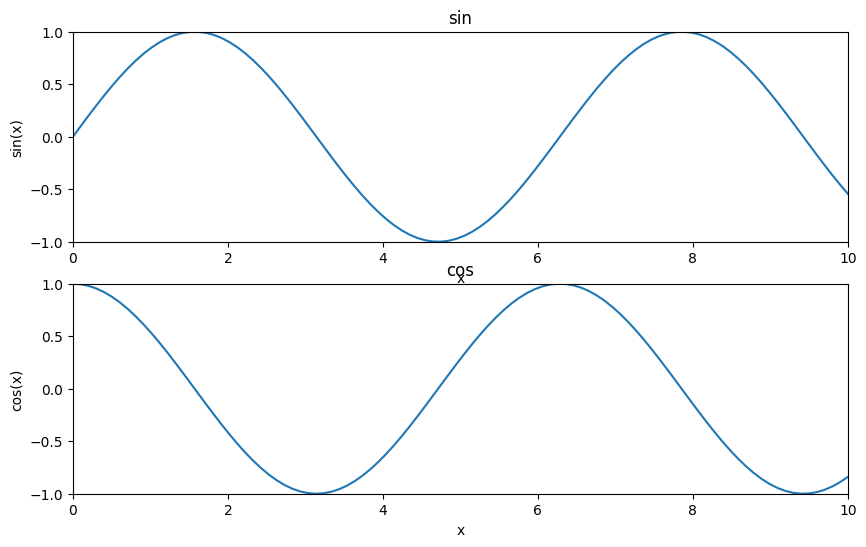

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 创建一个 10x6 英寸的画布
plt.figure(figsize=(10, 6))

# 创建 2x1 的子图网格，并激活第 1 个
plt.subplot(2, 1, 1)
plt.plot(x, y1)
plt.title("sin")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.xlim(0, 10)
plt.ylim(-1, 1)

# 激活第 2 个子图
plt.subplot(2, 1, 2)
plt.plot(x, y2)
plt.title("cos")
plt.xlabel("x")
plt.ylabel("cos(x)")
plt.xlim(0, 10)
plt.ylim(-1, 1)

# 显示图形（在脚本中必需）
plt.show()

#### 2. 方式二：面向对象 (ax)

这种方式更规范，也更灵活。先创建一个“画布”(`fig`) 和一个或多个“坐标系”(`ax`)，然后调用 `ax` 对象的方法来绘图。

  * **特点**：逻辑清晰，可以精细控制图表的每一个部分，适合绘制复杂图表。
  * **如何使用**：
    1.  用 `fig, ax = plt.subplots()` 创建画布和坐标系。
    2.  调用 `ax.plot()`、`ax.set_title()`、`ax.set_xlabel()` 等方法。

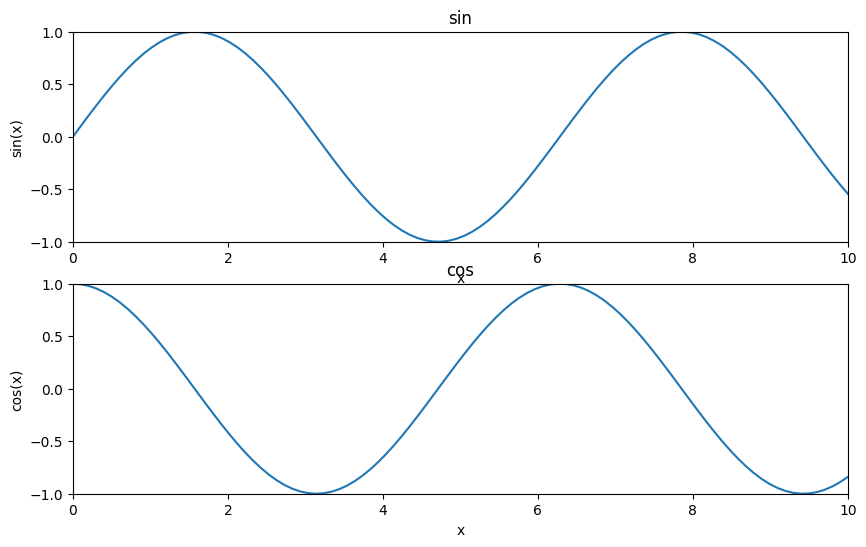

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 创建一个画布(fig)和包含2个坐标系(ax)的网格
# fig 指的是整张图，ax 是一个包含2个子图对象的数组 (ax[0], ax[1])
fig, ax = plt.subplots(2, figsize=(10, 6)) # 2行，10x6 英寸

# 操作第 1 个子图 (ax[0])
ax[0].plot(x, y1)
ax[0].set_title("sin")
ax[0].set_xlabel("x")
ax[0].set_ylabel("sin(x)")
ax[0].set_xlim(0, 10)
ax[0].set_ylim(-1, 1)

# 操作第 2 个子图 (ax[1])
ax[1].plot(x, y2)
ax[1].set_title("cos")
ax[1].set_xlabel("x")
ax[1].set_ylabel("cos(x)")
ax[1].set_xlim(0, 10)
ax[1].set_ylim(-1, 1)

plt.show()

**应用场景：**

  * **用 plt**：快速、简单地画一张图。
  * **用 ax**：画多张子图、在图中添加复杂元素，或编写可复用的绘图函数时。**（推荐）**

### 解决中文和负号显示问题

Matplotlib 默认不支持中文，且可能将负号显示为方框。可以通过 `rcParams` 修改全局配置，并**根据操作系统和当前实际已安装的字体自动选择合适的中文字体**来解决。

* 通过 `rcParams` 设置全局字体和负号显示：
  * 在 **Windows** 下，从 `SimHei`、`Microsoft YaHei` 等常见中文字体中自动选择可用的一个；
  * 在 **macOS** 下，从 `PingFang SC`、`Songti SC`、`STHeiti`、`Hiragino Sans GB` 等系统常见中文字体中自动选择可用的一个；
  * 若找不到候选字体，则使用默认字体（此时中文可能显示为方框）；
  * 通过 `rcParams["axes.unicode_minus"] = False` 解决负号显示为方框的问题。

示例代码（自动判断系统并选择可用的中文字体）：

使用字体: Songti SC


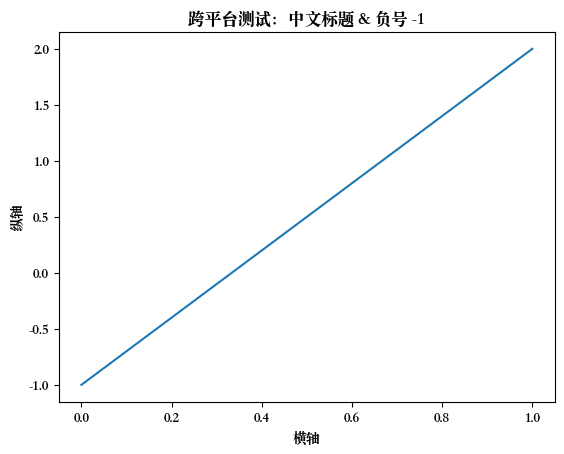

In [7]:
import sys
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager

def pick_font(candidates):
    """从候选字体列表中选出当前系统里存在的第一个"""
    available = {f.name for f in font_manager.fontManager.ttflist}
    for name in candidates:
        if name in available:
            return name
    return None

# 不同系统下的中文字体候选列表
if sys.platform.startswith("win"):
    # Windows 上常见的中文字体
    candidate_fonts = [
        "SimHei",           # 黑体
        "Microsoft YaHei",  # 微软雅黑
        "MS Gothic"
    ]
elif sys.platform == "darwin":
    # macOS 上常见的中文字体（按你机器实际情况为准）
    candidate_fonts = [
        "PingFang SC",
        "Heiti SC",
        "STHeiti",
        "Songti SC",
        "Hiragino Sans GB",
        "Noto Sans CJK SC",
    ]
else:
    # 其他系统，比如 Linux，可以再补充
    candidate_fonts = [
        "Noto Sans CJK SC",
        "SimHei",
        "WenQuanYi Zen Hei"
    ]

font_name = pick_font(candidate_fonts)

if font_name:
    print(f"使用字体: {font_name}")
    rcParams["font.sans-serif"] = [font_name]
    rcParams["font.family"] = "sans-serif"
else:
    print("⚠ 没找到候选中文字体，将使用默认字体（中文可能显示为方框）。")

# 解决负号显示为方框
rcParams["axes.unicode_minus"] = False

# ==== 测试 ====
plt.plot([0, 1], [-1, 2])
plt.title("跨平台测试：中文标题 & 负号 -1")
plt.xlabel("横轴")
plt.ylabel("纵轴")
plt.show()


### 单变量可视化：直方图 (hist)

  * 直方图用于查看**单**个数值变量的**分布**情况。它会把数据分成几个“桶”（bins），然后统计每个桶里有多少数据。

**代码示例**：使用面向对象的方式，加载 `weather.csv` 数据，查看“降水量”的分布。

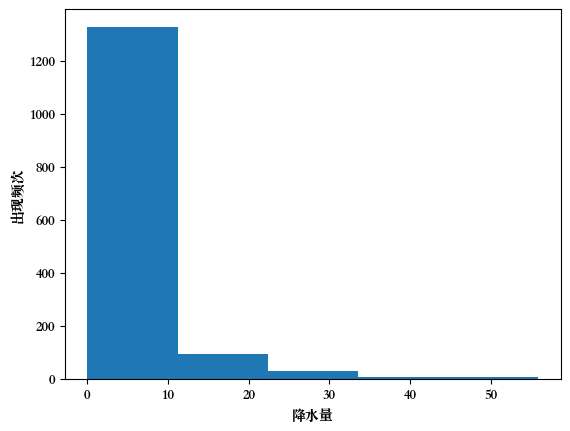

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 df 已经加载并设置好中文字体
df = pd.read_csv("data/weather.csv")

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

# 绘制直方图，将降水量数据分为 5 个桶
ax1.hist(df["precipitation"], bins=5)

ax1.set_xlabel("降水量")
ax1.set_ylabel("出现频次")
plt.show()

### 双变量可视化：散点图 (scatter)

  * 散点图用于查看**两**个数值变量之间的**关系**。

**代码示例**：查看“最高气温”和“降水量”之间是否存在关系。

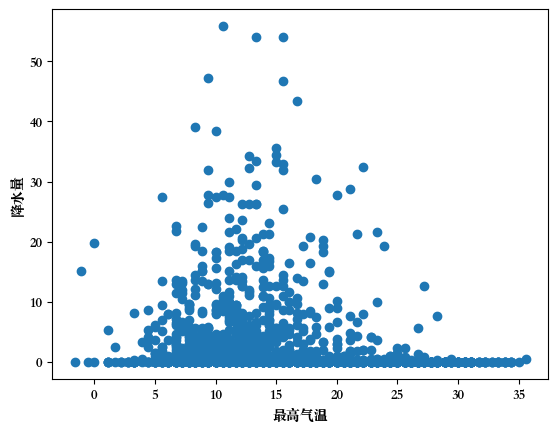

In [9]:
# 假设 df 已经加载并设置好中文字体
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

# 绘制散点图，x轴为最高气温，y轴为降水量
ax1.scatter(df["temp_max"], df["precipitation"])

ax1.set_xlabel("最高气温")
ax1.set_ylabel("降水量")
plt.show()

每个点代表一天，其位置由当天的最高气温和降水量决定。

### 多变量可视化：带颜色的散点图

  * 在散点图的基础上，使用**颜色**或**大小**来表示第**三**个变量。

**代码示例**：在“最高气温”和“降水量”的散点图上，用不同颜色区分不同年份的数据。

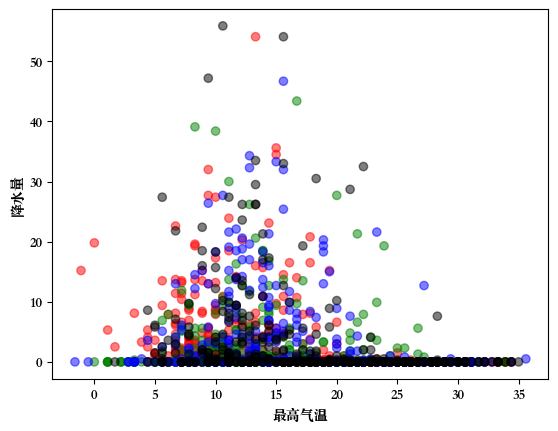

In [10]:
# 定义一个函数，根据年份返回颜色
def year_color(x):
    match x.year:
        case 2012:
            return "r" # 红色
        case 2013:
            return "g" # 绿色
        case 2014:
            return "b" # 蓝色
        case 2015:
            return "k" # 黑色

# 转换日期列，并应用函数创建新 'color' 列
df["date"] = pd.to_datetime(df["date"])
df["color"] = df["date"].apply(year_color)

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

# 使用 c 参数指定颜色列，alpha 设置透明度
ax1.scatter(df["temp_max"], df["precipitation"], c=df["color"], alpha=0.5)

ax1.set_xlabel("最高气温")
ax1.set_ylabel("降水量")
plt.show()

## Pandas 快速可视化

  * Pandas 提供了 `.plot()` 方法，它是 Matplotlib 的一层封装。这使得从 DataFrame 或 Series 直接绘图变得极其方便。
  * `df['column'].plot.hist()` 或 `df.plot.scatter(x='col1', y='col2')`。

**加载数据：**
使用 `sleep.csv` 数据集。

In [11]:
import pandas as pd
import matplotlib.pyplot as plt # Pandas 绘图依赖 Matplotlib

df_sleep = pd.read_csv("data/sleep.csv")
# df_sleep.info()

### 单变量可视化

#### 1. 柱状图 (`.plot.bar()`)

  * 用于展示**类别数据**的频次或数量对比。

**代码示例**：统计不同睡眠时长的出现次数。我们先用 `pd.cut` 将连续的睡眠时长分箱（分段），然后用 `value_counts()` 统计，最后绘图。

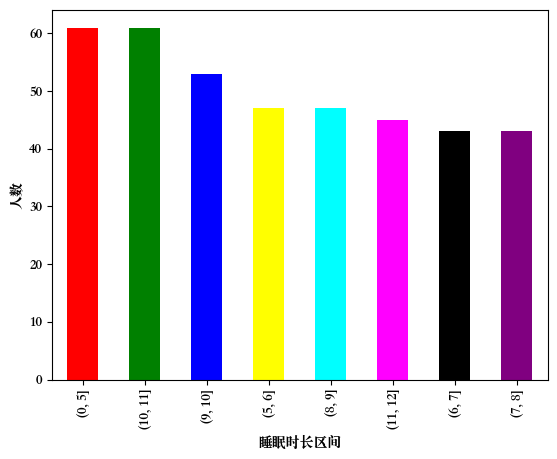

In [12]:
# 将睡眠时长分为几个区间
sleep_counts = pd.cut(df_sleep["sleep_duration"], [0, 5, 6, 7, 8, 9, 10, 11, 12]).value_counts()

# 直接在 Series 上调用 .plot.bar()
sleep_counts.plot.bar(
    color=["red", "green", "blue", "yellow", "cyan", "magenta", "black", "purple"]
)
plt.xlabel("睡眠时长区间")
plt.ylabel("人数")
plt.show()

#### 2. 直方图 (`.plot.hist()`)

  * 用于展示**数值数据**的分布。

**代码示例**：直接在“睡眠时长”这一列上绘制直方图。

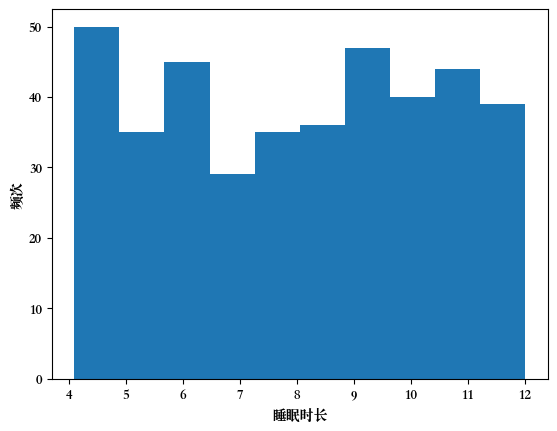

In [13]:
df_sleep["sleep_duration"].plot.hist()
plt.xlabel("睡眠时长")
plt.ylabel("频次")
plt.show()

### 双变量可视化

#### 1. 散点图 (`.plot.scatter()`)

  * 查看两个数值变量的关系。

**代码示例**：绘制“睡眠时间”与“睡眠质量”的散点图。

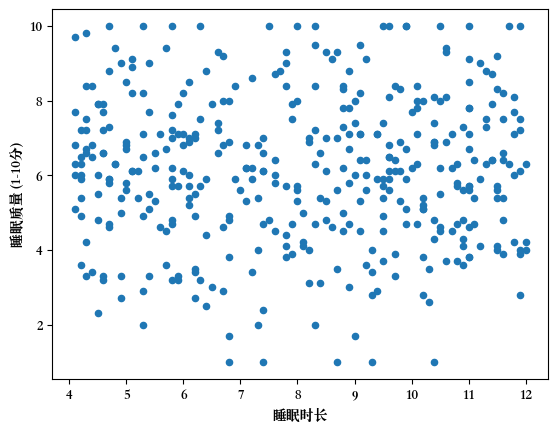

In [14]:
df_sleep.plot.scatter(x="sleep_duration", y="sleep_quality")
plt.xlabel("睡眠时长")
plt.ylabel("睡眠质量 (1-10分)")
plt.show()

#### 2. 堆叠柱状图 (`.plot.bar(stacked=True)`)

  * 用于比较不同组别的**总量**，同时展示每个组别内部的**构成**。

**代码示例**：我们想知道不同“睡眠质量”的人，他们的“睡眠时长”分布是怎样的。
1.  我们先创建两个分箱列 `sleep_quality_stage` 和 `sleep_duration_stage`。
2.  使用 `pivot_table` (数据透视表) 来统计交叉频次。
3.  绘制堆叠柱状图。

/var/folders/t_/7nnlk6vd6636n2yds3_5gm6h0000gn/T/ipykernel_24508/3402876779.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot_table = df_sleep.pivot_table(


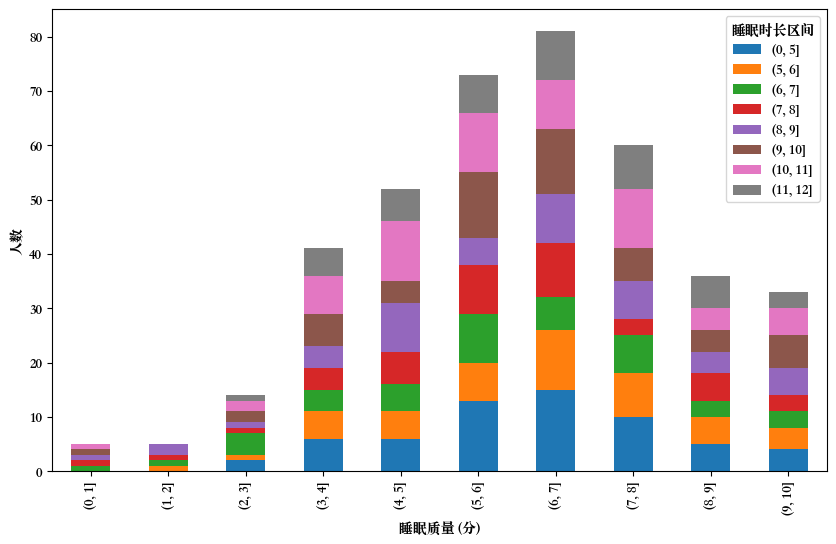

In [15]:
# 1. 数据分箱
df_sleep["sleep_quality_stage"] = pd.cut(df_sleep["sleep_quality"], range(11))
df_sleep["sleep_duration_stage"] = pd.cut(df_sleep["sleep_duration"], [0, 5, 6, 7, 8, 9, 10, 11, 12])

# 2. 创建数据透视表
df_pivot_table = df_sleep.pivot_table(
    values="person_id",
    index="sleep_quality_stage", # 行索引
    columns="sleep_duration_stage", # 列
    aggfunc="count" # 统计个数
)

# 3. 绘制堆叠柱状图
df_pivot_table.plot.bar(stacked=True, figsize=(10, 6))
plt.xlabel("睡眠质量 (分)")
plt.ylabel("人数")
plt.legend(title="睡眠时长区间")
plt.show()